## Importing libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---

## Importing data

In [2]:
train_path = os.path.join('data', 'train.csv')
test_path = os.path.join('data', 'test.csv')

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

---

## Data overview

### Training Data

In [3]:
train_data.shape

(5500, 23)

In [4]:
train_data.dtypes

Choice                   int64
A_follower_count         int64
A_following_count        int64
A_listed_count           int64
A_mentions_received    float64
A_retweets_received    float64
A_mentions_sent        float64
A_retweets_sent        float64
A_posts                float64
A_network_feature_1      int64
A_network_feature_2    float64
A_network_feature_3    float64
B_follower_count         int64
B_following_count        int64
B_listed_count           int64
B_mentions_received    float64
B_retweets_received    float64
B_mentions_sent        float64
B_retweets_sent        float64
B_posts                float64
B_network_feature_1      int64
B_network_feature_2    float64
B_network_feature_3    float64
dtype: object

Our possible features are: 

**A_follower_count**: Amount of followers from individual A

**A_following_count**: Amount of accounts individual A follows

**A_listed_count**: Amount of lists individual A is included in

**A_mentions_received**: Amount of times individual A was mentioned

**A_retweets_received**: Amount of retweets received by individual A

**A_mentions_sent**: Amount of times individual A mentioned someone

**A_retweets_sent**: Amount of retweets made by individual A

**A_posts**: Amount of posts made by individual A

**A_network_feature_1**: Description of the local follower network of individual A

**A_network_feature_2**: Description of the local follower network of individual A

**A_network_feature_3**: Description of the local follower network of individual A

**B_follower_count**: Amount of followers from individual B

**B_following_count**: Amount of accounts individual B follows

**B_listed_count**: Amount of lists individual B is included in

**B_mentions_received**: Amount of times individual B was mentioned

**B_retweets_received**: Amount of retweets received by individual B

**B_mentions_sent**: Amount of times individual B mentioned someone

**B_retweets_sent**: Amount of retweets made by individual B

**B_posts**: Amount of posts made by individual B

**B_network_feature_1**: Description of the local follower network of individual B

**B_network_feature_2**: Description of the local follower network of individual B

**B_network_feature_3**: Description of the local follower network of individual B

In [5]:
train_data.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


### Testing Data

In [6]:
test_data.shape

(5952, 22)

In [7]:
test_data.dtypes

A_follower_count         int64
A_following_count        int64
A_listed_count           int64
A_mentions_received    float64
A_retweets_received    float64
A_mentions_sent        float64
A_retweets_sent        float64
A_posts                float64
A_network_feature_1      int64
A_network_feature_2    float64
A_network_feature_3    float64
B_follower_count         int64
B_following_count        int64
B_listed_count           int64
B_mentions_received    float64
B_retweets_received    float64
B_mentions_sent        float64
B_retweets_sent        float64
B_posts                float64
B_network_feature_1      int64
B_network_feature_2    float64
B_network_feature_3    float64
dtype: object

In [8]:
test_data.head()

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,614689,400,5729,199.618296,67.812469,9.366192,0.359534,4.094488,669,39.193741,...,563,20057,967.720642,579.431128,4.473798,0.805680,6.241806,4027,57.643839,3201.293706
1,739581,10723,1279,102.026750,96.771319,1.537322,1.054358,3.467754,432,11.191686,...,12949,1311,38.260522,10.697567,12.845793,1.584284,12.106662,144,209.717241,21496.565517
2,3638,3341,85,2.793577,1.402703,2.594089,0.598150,3.802143,11,9.416667,...,320,3673,1207.190077,599.721600,0.842022,0.593199,7.044735,3918,7.859818,637.983300
3,613,1259,31,1.326041,0.356943,6.249678,2.323064,7.488116,4,5.000000,...,3599,1072,10.300222,3.828561,1.624092,0.100503,1.614287,43,113.840909,2537.772727
4,1352348,331,15647,19129.848662,14552.733991,2.065418,0.580955,16.281502,52580,3.092448,...,147521,15043,9902.070379,5012.055876,10.438460,0.100503,193.072418,28564,10.964144,1035.955493


## Separating data: features and labels

To make our analysis easy, we will separate the data into:

**X_train**: (possible) training features.

**y_train**: labels.

**X_test**: (possible) test features.

We will call __features__ the list with the names of the columns that might be the features and __label__ the name of the column which has the labels (**Survived** column).

In [9]:
features = list(test_data.columns)
label = 'Choice'

In [10]:
x_train = train_data[features]
y_train = train_data[label]
x_test = test_data[features]

## Training Data Analysis

In [11]:
y_train.head()

0    0
1    0
2    0
3    0
4    1
Name: Choice, dtype: int64

In [12]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   A_follower_count     5500 non-null   int64  
 1   A_following_count    5500 non-null   int64  
 2   A_listed_count       5500 non-null   int64  
 3   A_mentions_received  5500 non-null   float64
 4   A_retweets_received  5500 non-null   float64
 5   A_mentions_sent      5500 non-null   float64
 6   A_retweets_sent      5500 non-null   float64
 7   A_posts              5500 non-null   float64
 8   A_network_feature_1  5500 non-null   int64  
 9   A_network_feature_2  5500 non-null   float64
 10  A_network_feature_3  5500 non-null   float64
 11  B_follower_count     5500 non-null   int64  
 12  B_following_count    5500 non-null   int64  
 13  B_listed_count       5500 non-null   int64  
 14  B_mentions_received  5500 non-null   float64
 15  B_retweets_received  5500 non-null   f

In [13]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   A_follower_count     5500 non-null   int64  
 1   A_following_count    5500 non-null   int64  
 2   A_listed_count       5500 non-null   int64  
 3   A_mentions_received  5500 non-null   float64
 4   A_retweets_received  5500 non-null   float64
 5   A_mentions_sent      5500 non-null   float64
 6   A_retweets_sent      5500 non-null   float64
 7   A_posts              5500 non-null   float64
 8   A_network_feature_1  5500 non-null   int64  
 9   A_network_feature_2  5500 non-null   float64
 10  A_network_feature_3  5500 non-null   float64
 11  B_follower_count     5500 non-null   int64  
 12  B_following_count    5500 non-null   int64  
 13  B_listed_count       5500 non-null   int64  
 14  B_mentions_received  5500 non-null   float64
 15  B_retweets_received  5500 non-null   f

In [14]:
A_features = x_train.columns[0:11]
B_features = x_train.columns[11:22]

A_train = x_train[A_features].copy()
B_train = x_train[B_features].copy()

AB_features = [s[2:] for s in list(A_features)]
A_rename_cols_dict = dict(zip(A_features, AB_features))
B_rename_cols_dict = dict(zip(B_features, AB_features))

A_train.rename(columns = A_rename_cols_dict, inplace = True)
B_train.rename(columns = B_rename_cols_dict, inplace = True)

AB_train = pd.concat([A_train, B_train], axis = 0)

In [15]:
AB_train.head()

,follower_count,following_count,listed_count,mentions_received,retweets_received,mentions_sent,retweets_sent,posts,network_feature_1,network_feature_2,network_feature_3
0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,166.500000,11355.000000
1,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,18.442971,1330.366048
2,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,68.927835,5999.896907
3,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,2.000000,96.166667
4,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,127.404293,2833.847943


In [16]:
x_train.head()

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,166.500000,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,18.442971,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,68.927835,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,2.000000,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,127.404293,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


### Univariate Analysis

#### Choice

In [17]:
y_train.describe()

count    5500.000000
mean        0.509455
std         0.499956
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Choice, dtype: float64

In [18]:
y_train.value_counts()

1    2802
0    2698
Name: Choice, dtype: int64

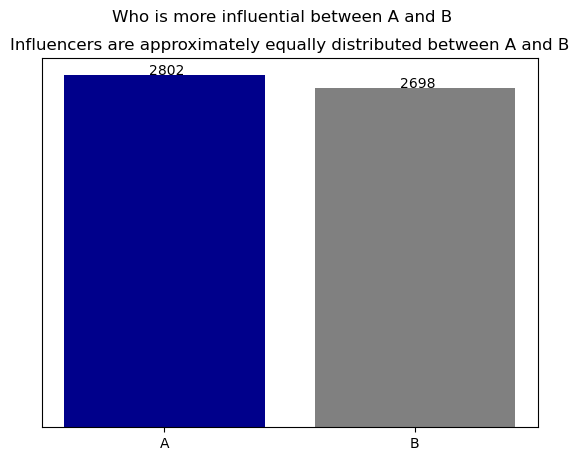

In [19]:
A_more_influential = y_train.value_counts()[1]
B_more_influential = y_train.value_counts()[0]
plt.bar(x = ['A', 'B'], height = y_train.value_counts(), color = ['darkblue', 'gray'])
plt.text(0 - 0.06, A_more_influential + 4, f'{A_more_influential}')
plt.text(1 - 0.06, B_more_influential + 4, f'{B_more_influential}')
plt.yticks([])
plt.suptitle('Who is more influential between A and B')
plt.title(f'Influencers are approximately equally distributed between A and B')

plt.show()

#### Follower Count

In [20]:
follower_count = AB_train['follower_count']
follower_count.describe()

count    1.100000e+04
mean     6.676854e+05
std      2.095717e+06
min      1.600000e+01
25%      2.651000e+03
50%      4.403400e+04
75%      3.927380e+05
max      3.654319e+07
Name: follower_count, dtype: float64

In [21]:
follower_count.isnull().value_counts()

False    11000
Name: follower_count, dtype: int64

[Text(1, 0, '')]

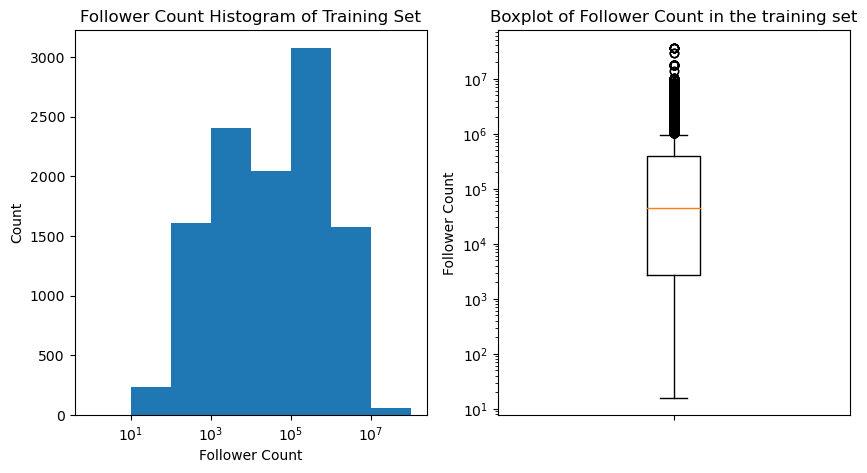

In [22]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

axes[0].hist(follower_count, bins=np.logspace(0, 8, 9))
axes[0].set_xscale('log')
axes[0].set_title('Follower Count Histogram of Training Set')
axes[0].set_xlabel('Follower Count')
axes[0].set_ylabel('Count')

axes[1].boxplot(follower_count)
axes[1].set_yscale('log')
axes[1].set_title("Boxplot of Follower Count in the training set")
axes[1].set_ylabel('Follower Count')
axes[1].set_xticklabels([])

#### Following Count

In [23]:
following_count = AB_train['following_count']
following_count.describe()

count    1.100000e+04
mean     1.269860e+04
std      4.953212e+04
min      0.000000e+00
25%      3.220000e+02
50%      7.730000e+02
75%      2.838000e+03
max      1.165830e+06
Name: following_count, dtype: float64

In [24]:
following_count.isnull().value_counts()

False    11000
Name: following_count, dtype: int64

[Text(1, 0, '')]

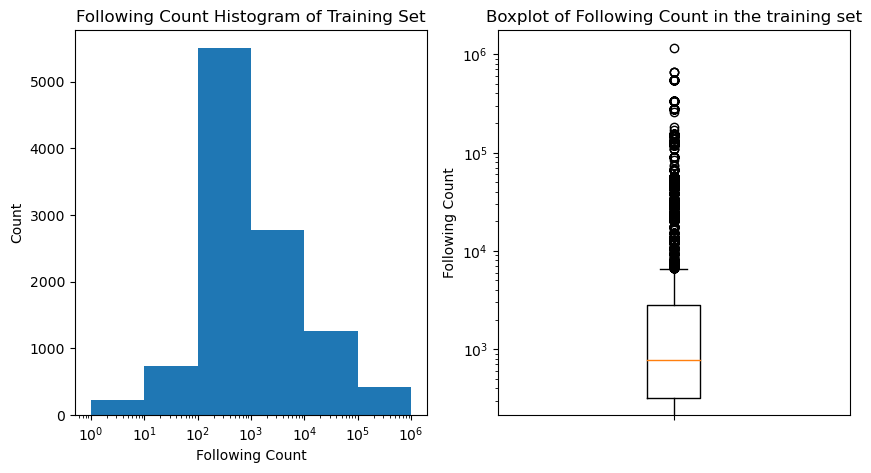

In [25]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

axes[0].hist(following_count, bins=np.logspace(0, 6, 7))
axes[0].set_xscale('log')
axes[0].set_title('Following Count Histogram of Training Set')
axes[0].set_xlabel('Following Count')
axes[0].set_ylabel('Count')

axes[1].boxplot(following_count)
axes[1].set_yscale('log')
axes[1].set_title("Boxplot of Following Count in the training set")
axes[1].set_ylabel('Following Count')
axes[1].set_xticklabels([])

#### Listed Count

In [26]:
listed_count = AB_train['listed_count']
listed_count.describe()

count     11000.000000
mean       5927.800818
std       16826.101922
min           0.000000
25%          82.000000
50%         932.000000
75%        6734.000000
max      549144.000000
Name: listed_count, dtype: float64

In [27]:
listed_count.isnull().value_counts()

False    11000
Name: listed_count, dtype: int64

[Text(1, 0, '')]

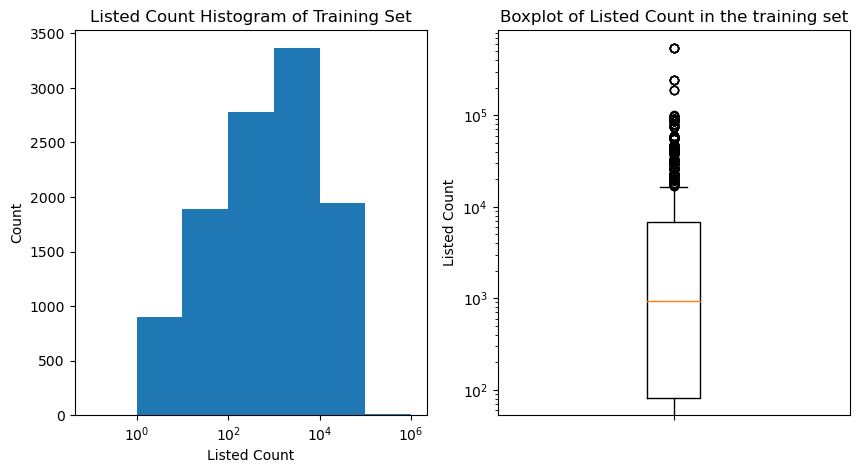

In [28]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

axes[0].hist(listed_count, bins=np.logspace(-1, 6, 8))
axes[0].set_xscale('log')
axes[0].set_title('Listed Count Histogram of Training Set')
axes[0].set_xlabel('Listed Count')
axes[0].set_ylabel('Count')

axes[1].boxplot(listed_count)
axes[1].set_yscale('log')
axes[1].set_title("Boxplot of Listed Count in the training set")
axes[1].set_ylabel('Listed Count')
axes[1].set_xticklabels([])

#### Mentions Received

In [29]:
mentions_received = AB_train['mentions_received']
mentions_received.describe()

count    1.100000e+04
mean     2.610315e+03
std      2.720237e+04
min      1.005034e-01
25%      3.427661e+00
50%      4.876542e+01
75%      3.524995e+02
max      1.145219e+06
Name: mentions_received, dtype: float64

In [30]:
mentions_received.isnull().value_counts()

False    11000
Name: mentions_received, dtype: int64

[Text(1, 0, '')]

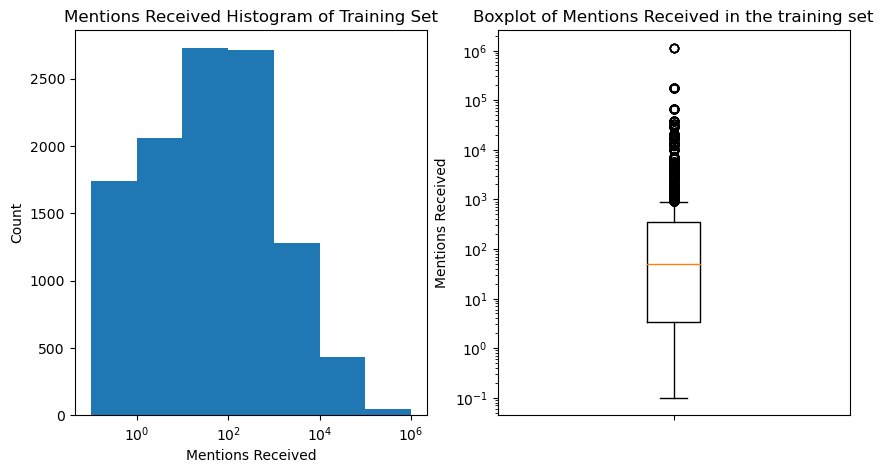

In [31]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

axes[0].hist(mentions_received, bins=np.logspace(-1, 6, 8))
axes[0].set_xscale('log')
axes[0].set_title('Mentions Received Histogram of Training Set')
axes[0].set_xlabel('Mentions Received')
axes[0].set_ylabel('Count')

axes[1].boxplot(mentions_received)
axes[1].set_yscale('log')
axes[1].set_title("Boxplot of Mentions Received in the training set")
axes[1].set_ylabel('Mentions Received')
axes[1].set_xticklabels([])

#### Retweets Received

In [32]:
retweets_received = AB_train['retweets_received']
retweets_received.describe()

count     11000.000000
mean       1014.760896
std       10180.026211
min           0.100503
25%           0.716816
50%          14.029113
75%         107.081021
max      435825.874241
Name: retweets_received, dtype: float64

In [33]:
retweets_received.isnull().value_counts()

False    11000
Name: retweets_received, dtype: int64

[Text(1, 0, '')]

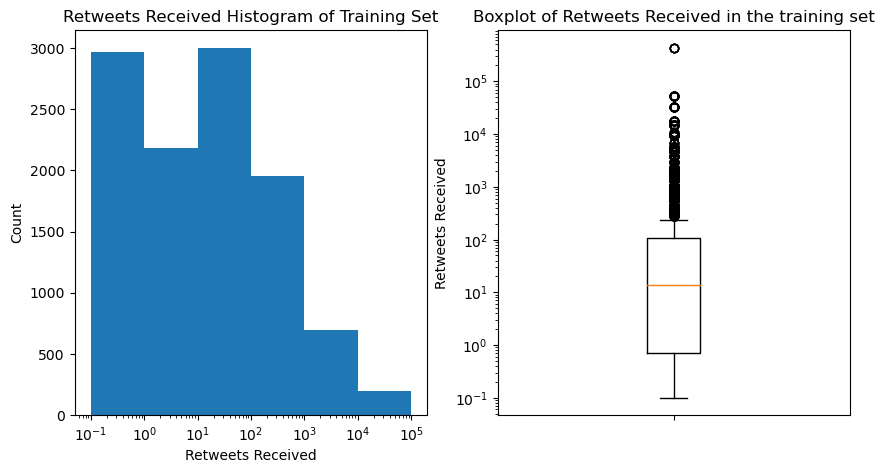

In [34]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

axes[0].hist(retweets_received, bins=np.logspace(-1, 5, 7))
axes[0].set_xscale('log')
axes[0].set_title('Retweets Received Histogram of Training Set')
axes[0].set_xlabel('Retweets Received')
axes[0].set_ylabel('Count')

axes[1].boxplot(retweets_received)
axes[1].set_yscale('log')
axes[1].set_title("Boxplot of Retweets Received in the training set")
axes[1].set_ylabel('Retweets Received')
axes[1].set_xticklabels([])

#### Mentions Sent

In [35]:
mentions_sent = AB_train['mentions_sent']
mentions_sent.describe()

count    11000.000000
mean         6.055765
std          9.624911
min          0.100503
25%          0.356943
50%          2.269438
75%          6.971926
max         76.809514
Name: mentions_sent, dtype: float64

In [36]:
mentions_sent.isnull().value_counts()

False    11000
Name: mentions_sent, dtype: int64

[Text(1, 0, '')]

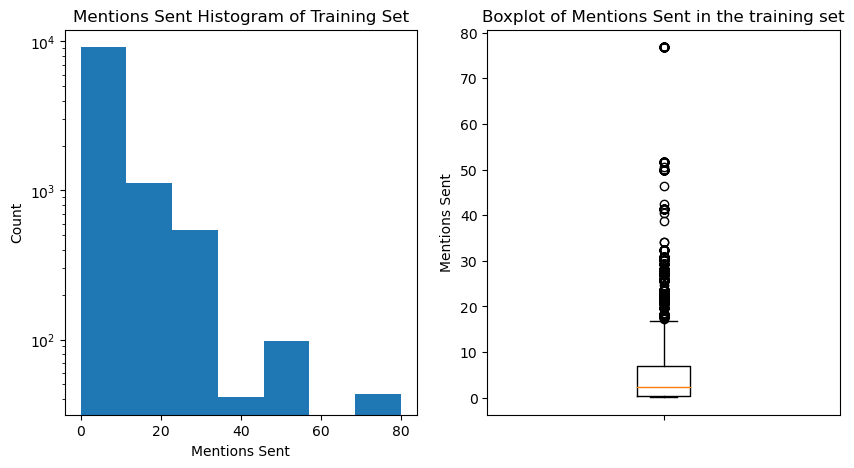

In [37]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

axes[0].hist(mentions_sent, bins=np.linspace(0, 80, 8))
axes[0].set_yscale('log')
axes[0].set_title('Mentions Sent Histogram of Training Set')
axes[0].set_xlabel('Mentions Sent')
axes[0].set_ylabel('Count')

axes[1].boxplot(mentions_sent)
axes[1].set_title("Boxplot of Mentions Sent in the training set")
axes[1].set_ylabel('Mentions Sent')
axes[1].set_xticklabels([])

#### Retweets Sent

In [38]:
retweets_sent = AB_train['retweets_sent']
retweets_sent.describe()

count    11000.000000
mean         1.108080
std          1.924980
min          0.100503
25%          0.100503
50%          0.341936
75%          1.320681
max         16.290540
Name: retweets_sent, dtype: float64

In [39]:
retweets_sent.isnull().value_counts()

False    11000
Name: retweets_sent, dtype: int64

[Text(1, 0, '')]

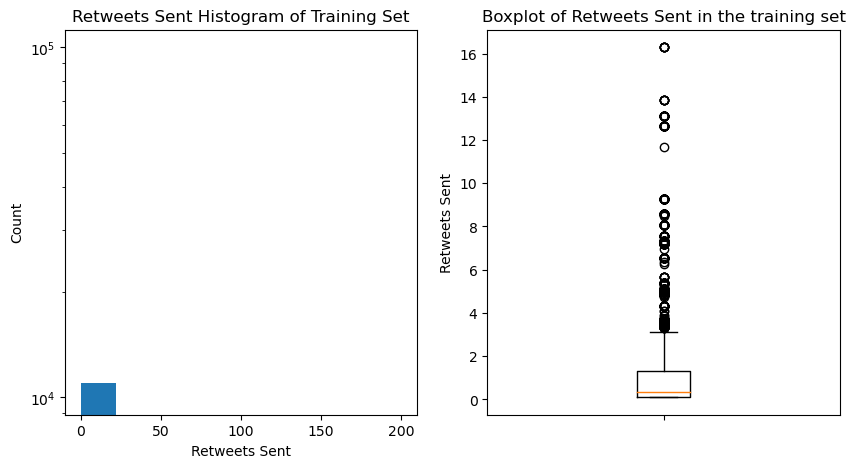

In [40]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

axes[0].hist(retweets_sent, bins=np.linspace(0, 200, 10))
axes[0].set_yscale('log')
axes[0].set_title('Retweets Sent Histogram of Training Set')
axes[0].set_xlabel('Retweets Sent')
axes[0].set_ylabel('Count')

axes[1].boxplot(retweets_sent)
axes[1].set_title("Boxplot of Retweets Sent in the training set")
axes[1].set_ylabel('Retweets Sent')
axes[1].set_xticklabels([])

#### Posts

In [41]:
posts = AB_train['posts']
posts.describe()

count    11000.000000
mean         9.298275
std         18.876368
min          0.100503
25%          0.822584
50%          3.467754
75%         10.600502
max        193.072418
Name: posts, dtype: float64

In [42]:
posts.isnull().value_counts()

False    11000
Name: posts, dtype: int64

[Text(1, 0, '')]

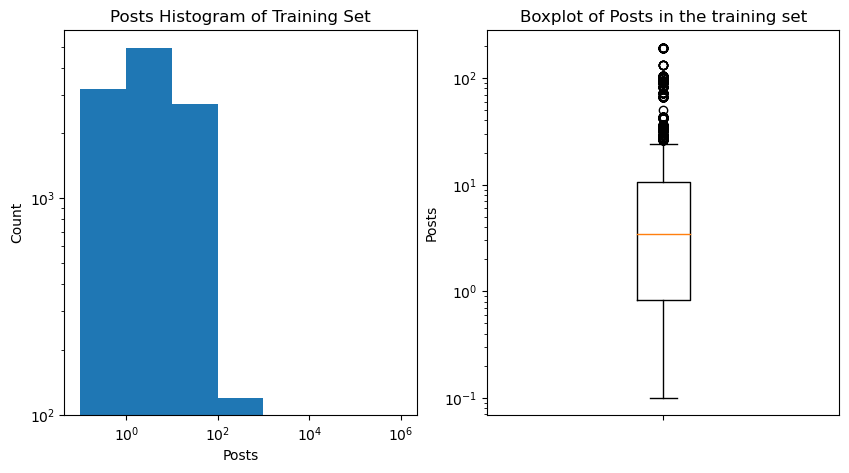

In [43]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

axes[0].hist(posts, bins=np.logspace(-1, 6, 8))
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_title('Posts Histogram of Training Set')
axes[0].set_xlabel('Posts')
axes[0].set_ylabel('Count')

axes[1].boxplot(posts)
axes[1].set_yscale('log')
axes[1].set_title("Boxplot of Posts in the training set")
axes[1].set_ylabel('Posts')
axes[1].set_xticklabels([])

---

## Preprocessing Data for Machine Learning

In [44]:
train_data.corr()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
Choice,1.000000,0.134133,0.063678,0.135078,0.020745,0.024139,0.123868,0.137833,0.107648,0.065543,...,-0.042859,-0.191179,-0.062332,-0.064774,-0.139521,-0.168341,-0.102028,-0.108259,-0.051364,-0.069339
A_follower_count,0.134133,1.000000,0.115834,0.815952,0.511609,0.521888,0.018456,0.094799,0.042993,0.622146,...,0.033327,0.140186,0.029233,0.030709,-0.011715,-0.010649,-0.013452,0.051651,-0.033974,-0.014107
A_following_count,0.063678,0.115834,1.000000,0.100696,0.058140,0.051819,0.111342,-0.083883,0.138373,0.047236,...,-0.010944,-0.011792,0.001077,-0.001774,0.006797,0.002244,-0.000280,-0.002475,0.003415,-0.003968
A_listed_count,0.135078,0.815952,0.100696,1.000000,0.734589,0.747752,0.061729,0.155630,0.053975,0.705268,...,0.048962,0.203068,0.045555,0.045333,-0.002835,0.006040,0.003535,0.068414,-0.034576,-0.010478
A_mentions_received,0.020745,0.511609,0.058140,0.734589,1.000000,0.990021,0.023336,0.050100,0.026512,0.922340,...,0.023431,0.136128,0.010900,0.008098,-0.008721,-0.012288,-0.011123,0.023156,-0.017576,-0.011153
A_retweets_received,0.024139,0.521888,0.051819,0.747752,0.990021,1.000000,0.019130,0.043846,0.033068,0.928273,...,0.023340,0.139695,0.011525,0.008719,-0.007203,-0.012692,-0.009671,0.023931,-0.017675,-0.012855
A_mentions_sent,0.123868,0.018456,0.111342,0.061729,0.023336,0.019130,1.000000,0.582630,0.607040,0.032608,...,0.027851,0.005401,0.006467,0.010684,0.016772,0.003553,0.019061,0.005172,0.016377,0.014035
A_retweets_sent,0.137833,0.094799,-0.083883,0.155630,0.050100,0.043846,0.582630,1.000000,0.379318,0.081908,...,0.016303,0.038314,0.057745,0.060162,0.029084,0.011914,0.039341,0.050733,-0.004573,0.005986
A_posts,0.107648,0.042993,0.138373,0.053975,0.026512,0.033068,0.607040,0.379318,1.000000,0.074683,...,0.021679,-0.005321,0.001848,0.005974,0.028039,0.002118,0.023880,-0.001924,0.010813,0.004692
A_network_feature_1,0.065543,0.622146,0.047236,0.705268,0.922340,0.928273,0.032608,0.081908,0.074683,1.000000,...,0.034620,0.127232,0.012452,0.011003,-0.002757,-0.012546,-0.010237,0.026392,-0.023533,-0.015348


In [45]:
y_train.head()

0    0
1    0
2    0
3    0
4    1
Name: Choice, dtype: int64

__y_train__ is ok. It's value's are 0 or 1 in the labels and go from 0 to 1 in the predictions, which must hold a threshold to classify the result.

In [46]:
x_train.head()

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,166.500000,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,18.442971,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,68.927835,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,2.000000,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,127.404293,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


We will do the following preprocess steps, which doesn't need to be done in order:

- Transform A and B pairs of features into a single __diffrat__ feature ((A - B)/(A + B))

In [60]:
preprocessed_y_train = y_train.copy()
preprocessed_x_train = pd.DataFrame()
preprocessed_x_test = pd.DataFrame()

In [61]:
A_features = x_train.columns[0:11]
B_features = x_train.columns[11:22]

A_train = x_train[A_features].copy()
B_train = x_train[B_features].copy()
A_test = x_test[A_features].copy()
B_test = x_test[B_features].copy()

AB_features = [s[2:] for s in list(A_features)]

for feature in AB_features:
    preprocessed_x_train[feature] = (A_train['A_' + feature] - B_train['B_' + feature]) / (A_train['A_' + feature] + B_train['B_' + feature])
    preprocessed_x_test[feature] = (A_test['A_' + feature] - B_test['B_' + feature]) / (A_test['A_' + feature] + B_test['B_' + feature])

In [62]:
preprocessed_x_train.head()

,follower_count,following_count,listed_count,mentions_received,retweets_received,mentions_sent,retweets_sent,posts,network_feature_1,network_feature_2,network_feature_3
0,-0.986855,-0.979940,-0.996454,-0.927069,-0.950788,-0.975796,-0.535702,-0.901469,-0.941176,0.375861,0.711135
1,-0.290388,0.163296,-0.751904,0.381527,0.485140,0.277683,0.326360,0.657330,0.387218,-0.754868,-0.375691
2,0.337358,0.431939,-0.342020,0.943998,0.928486,0.797743,0.709406,0.712276,0.938776,0.739259,0.911638
3,-0.997957,-0.999207,-0.985714,-0.973506,-0.998580,-0.907802,-0.972344,-0.837938,-0.993213,-0.842948,-0.871091
4,0.715710,-0.329965,0.871722,0.746540,0.823479,0.609503,0.497116,0.678922,0.732704,0.448564,0.174050


### To make this easy, we will save the preprocessed data in .csv files.

In [63]:
preprocessed_y_train_path = os.path.join('data', 'preprocessed_y_train.csv')
preprocessed_x_train_path = os.path.join('data', 'preprocessed_x_train.csv')
preprocessed_x_test_path = os.path.join('data', 'preprocessed_x_test.csv')

preprocessed_y_train.to_csv(preprocessed_y_train_path)
preprocessed_x_train.to_csv(preprocessed_x_train_path)
preprocessed_x_test.to_csv(preprocessed_x_test_path)

### Final Correlations

In [64]:
preprocessed_train_data = pd.concat([y_train, preprocessed_x_train], axis = 1)

In [65]:
preprocessed_train_data.corr()

,Choice,follower_count,following_count,listed_count,mentions_received,retweets_received,mentions_sent,retweets_sent,posts,network_feature_1,network_feature_2,network_feature_3
Choice,1.000000,0.568607,0.168821,0.594599,0.558203,0.545148,0.334841,0.287329,0.334249,0.567102,0.190911,0.275221
follower_count,0.568607,1.000000,0.269961,0.895252,0.807320,0.796463,0.346113,0.300192,0.390175,0.817576,0.106739,0.328575
following_count,0.168821,0.269961,1.000000,0.272088,0.180205,0.148181,0.200872,0.053254,0.156300,0.177035,0.292769,0.334974
listed_count,0.594599,0.895252,0.272088,1.000000,0.805537,0.787628,0.399665,0.320650,0.417238,0.817530,0.230893,0.352576
mentions_received,0.558203,0.807320,0.180205,0.805537,1.000000,0.948900,0.530146,0.428336,0.593168,0.995094,0.122675,0.292528
retweets_received,0.545148,0.796463,0.148181,0.787628,0.948900,1.000000,0.501672,0.418339,0.587911,0.948084,0.073989,0.247177
mentions_sent,0.334841,0.346113,0.200872,0.399665,0.530146,0.501672,1.000000,0.710424,0.829699,0.522851,0.288981,0.313998
retweets_sent,0.287329,0.300192,0.053254,0.320650,0.428336,0.418339,0.710424,1.000000,0.593429,0.425843,0.150680,0.180231
posts,0.334249,0.390175,0.156300,0.417238,0.593168,0.587911,0.829699,0.593429,1.000000,0.582633,0.178465,0.254280
network_feature_1,0.567102,0.817576,0.177035,0.817530,0.995094,0.948084,0.522851,0.425843,0.582633,1.000000,0.133786,0.300556
